# Aprender Machine learning  
## K-means

## Cómo funciona K-Means  
El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:  


Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.  
Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.  
Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.  

## Casos de Uso de K-Means  
El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.  

**Algunos casos de uso son:**  

- Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
- Categorización de Inventario: agrupar productos por actividad en sus ventas
- Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

### Aquí se listan las aplicaciones más frecuentes en Machine Learning  
**Datos de Entrada para K-Means**  
Las “features” o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela,etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real” -como en el caso de géneros de película o libros-. Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. No conviene utilizar features que estén correlacionados o que sean escalares de otros. Recordar los 7 pasos para el Aprendizaje Automático.

### Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_summary as ps
from mpl_toolkits.mplot3d import Axes3D

### Read data

In [2]:
df = pd.read_csv('analisis.csv')
df.head(2)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7


In [3]:
df_summary = ps.DataFrameSummary(df)

### EDA

In [9]:
df.shape

(140, 8)

In [8]:
df_summary.columns_types

numeric    7
unique     1
Name: types, dtype: int64

In [10]:
df_summary.uniques

Index(['usuario'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [14]:
df_summary.columns_stats.T

,counts,uniques,missing,missing_perc,types
usuario,140,140,0,0%,unique
op,140,140,0,0%,numeric
co,140,140,0,0%,numeric
ex,140,140,0,0%,numeric
ag,140,140,0,0%,numeric
ne,140,140,0,0%,numeric
wordcount,140,140,0,0%,numeric
categoria,140,9,0,0%,numeric


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
op,140.0,44.414591,8.425723,30.020465,38.206484,44.507091,49.365923,71.696129
co,140.0,22.977135,5.816851,7.852756,19.740299,22.466718,26.091606,49.637863
ex,140.0,40.764428,7.185246,18.693542,36.095722,41.457492,45.197769,59.824844
ag,140.0,22.918528,7.657122,9.305985,17.050993,21.384554,28.678867,40.583162
ne,140.0,8.000098,3.039248,1.030213,6.086144,7.839722,9.758189,23.978462
wordcount,140.0,98.715484,44.714071,5.020800,66.218475,94.711400,119.707925,217.183200
categoria,140.0,4.050000,2.658839,1.000000,2.000000,3.500000,7.000000,9.000000


El archivo contiene  9 categorías **actividades laborales** que son:  

1. Actor/actriz
1. Cantante
1. Modelo
1. Tv, series
1. Radio
1. Tecnología
1. Deportes
1. Politica
1. Escritor  

Para saber cuantos registros tenemos de cada uno hacemos:

In [19]:
df['categoria'].value_counts().sort_index()

1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
Name: categoria, dtype: int64

#### Histogram

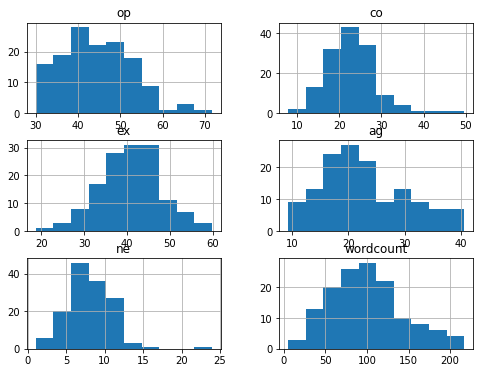

In [25]:
df.drop('categoria', axis = 1).hist(figsize = (8,6))
plt.show()

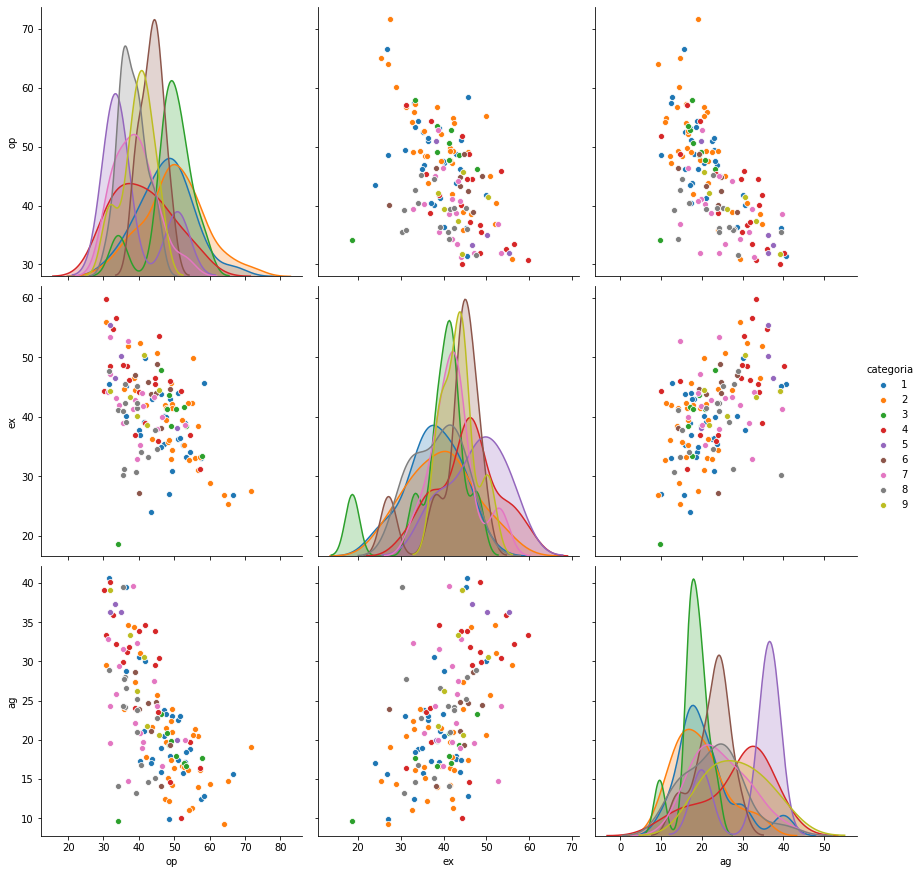

In [27]:
sns.pairplot(df.dropna(), hue= 'categoria', vars=["op","ex","ag"], height = 4, kind='scatter' )

#### Outliers

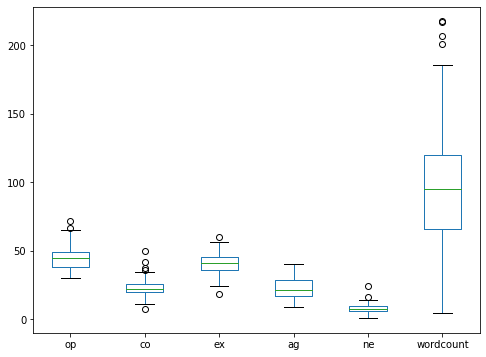

In [24]:
df.drop('categoria', axis = 1).plot.box(figsize = (8,6))
plt.show()

### Seleccionar los valores de entrada

In [28]:
X = df[["op","ex","ag"]]

In [29]:
X.head()

,op,ex,ag
0,34.297953,41.948819,29.370315
1,44.986842,37.938947,24.279098
2,41.733854,38.999896,34.645521
3,40.377154,52.337538,31.082154
4,36.664677,48.530806,31.138871


### Sklearn Kmeans

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

### Obetner el valor de K

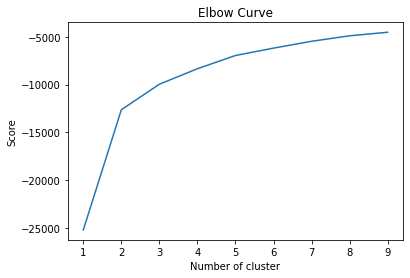

In [32]:
n_c = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in n_c]
score = [kmeans[i].fit(X).score(X)for i in range(len(kmeans))]

plt.plot(n_c, score)
plt.xlabel('Number of cluster')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [88]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [89]:
centroid =kmeans.cluster_centers_
centroid

array([[39.32026113, 44.81155487, 24.65211856],
       [49.6606333 , 41.17669023, 17.548775  ],
       [57.92200861, 31.5039735 , 15.67199517],
       [42.66891482, 33.31008136, 21.11530482],
       [35.43059843, 47.36032979, 34.68366068]])

In [90]:
labels = kmeans.predict(X)

In [70]:
colores=['red','green','blue','cyan','yellow', 'orange', 'brown', 'black', 'withe']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [71]:
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0,red
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,3,cyan
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,0,red
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,2,blue
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,2,blue


In [72]:
cantidad_grupo= pd.DataFrame()
cantidad_grupo['color'] = colores
cantidad_grupo['cantidad'] = df.groupby('labels').size()
cantidad_grupo

,color,cantidad
0,red,35.0
1,green,18.0
2,blue,24.0
3,cyan,23.0
4,yellow,40.0
5,orange,NaN
6,brown,NaN
7,black,NaN
8,withe,NaN


In [78]:
df['color'] = df['labels'].map({0:'red', 1:'green', 2:'blue', 3:'cyan', 4:'yellow')

In [79]:
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0,red
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,3,cyan
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,0,red
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,2,blue
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,2,blue


In [80]:
df.groupby('color').labels.count()

color
blue      24
cyan      23
green     18
red       35
yellow    40
Name: labels, dtype: int64

In [82]:
df[df['color']=='orange']

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color


In [83]:
df[df['color']=='cyan']

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,3,cyan
9,andy_murray,39.436667,26.135303,32.966288,32.291591,10.956591,177.5606,7,3,cyan
11,antoniobanderas,41.328182,20.241212,39.173333,21.070505,7.823535,32.8788,1,3,cyan
22,Carrie_Br4dshaw,34.186667,14.967083,18.693542,9.682292,7.200208,5.0208,3,3,cyan
25,cesarmillan,45.369773,23.932197,35.925909,23.478258,8.448409,159.7727,4,3,cyan
30,Clyburn,34.235923,33.397769,41.231615,14.153692,14.424923,185.4000,8,3,cyan
39,Diane_Keaton,46.955854,23.499024,35.376179,23.747561,4.934065,150.9431,1,3,cyan
56,GwynethPaltrow,49.470000,23.442595,30.966260,23.053053,9.577863,114.3435,1,3,cyan
58,HerreraBeutler,35.779512,26.518049,31.227724,27.689919,11.420325,182.1301,8,3,cyan
60,HillaryClinton,40.502021,25.407660,34.040957,16.767979,10.229043,171.3617,8,3,cyan


In [84]:
df[df['color']=='red']

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0,red
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,0,red
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7,0,red
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7,0,red
14,BarackObama,39.435149,20.091791,41.479403,21.004104,13.806343,178.1866,8,0,red
17,BillGates,43.372920,24.363358,43.792263,21.067737,11.348613,201.0511,6,0,red
26,CFKArgentina,35.943438,22.848281,45.519531,28.021250,6.521172,75.5156,8,0,red
27,charliesheen,36.272348,15.037348,40.065152,28.706894,12.412500,122.7727,1,0,red
28,ChristianG_7,44.501603,17.857099,46.598931,29.535038,2.913206,26.6870,4,0,red
36,DANIROVIRA,41.765960,23.895051,49.865253,30.071414,2.546667,50.5556,1,0,red


In [66]:
df[df['color']=='yellow']

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
8,andyroddick,46.393488,25.451163,39.930310,16.658062,8.452791,145.1473,7,4,yellow
10,AngelAlessandra,52.750992,24.706565,41.698855,17.057176,8.279847,97.2901,3,4,yellow
13,AvrilLavigne,47.610076,20.343788,39.439545,21.438409,8.865303,128.8561,2,4,yellow
15,BarRefaeli,48.617348,21.165758,43.617955,19.263258,5.176515,58.5833,3,4,yellow
18,britneyspears,49.792403,19.214496,41.435581,16.433953,7.039767,109.6434,2,4,yellow
21,carmenelectra,50.594462,19.282538,41.383154,17.896538,11.225692,143.8231,3,4,yellow
24,celinedion,47.276860,29.773140,41.973372,12.401860,7.285116,79.4186,2,4,yellow
29,CindyCrawford,49.028308,22.510385,38.450462,19.791538,7.538000,111.8000,3,4,yellow
31,CourteneyCox,53.110480,20.175600,39.006080,17.206400,4.092320,118.5280,1,4,yellow
32,Courtney,49.285420,22.643817,42.117786,21.008931,8.387252,114.1832,2,4,yellow


In [87]:
df[df['labels']==6]

,usuario,op,co,ex,ag,ne,wordcount,categoria,labels,color
